# Laboratorio Parte 1: Keras, MNIST data y redes totalmente conectadas (FC)

In [1]:
# importo librerias necesarias  # trabajo consta en clasificar estas imagenes de digitos.    
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback
from keras.optimizers import SGD
from keras.losses import mean_squared_error

Using TensorFlow backend.


In [2]:
from tensorflow.examples.tutorials.mnist import input_data

# importo y guardo MNIST data
mnist = input_data.read_data_sets("./mnist/data/", one_hot=True, validation_size=10000)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist/data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [3]:
x_train = mnist.train.images
y_train = mnist.train.labels    

print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")

x_train shape: (50000, 784) - y_train shape: (50000, 10)


In [0]:
x_valid = mnist.validation.images
y_valid = mnist.validation.labels

print(f"x_valid shape: {x_valid.shape} - y_valid shape: {y_valid.shape}")

x_valid shape: (10000, 784) - y_valid shape: (10000, 10)


In [0]:
x_test = mnist.test.images
y_test = mnist.test.labels

print(f"x_test shape: {x_valid.shape} - y_test shape: {y_test.shape}")

x_test shape: (10000, 784) - y_test shape: (10000, 10)


# Definición y entrenamiento del Modelo

In [0]:
# Model Sofy 1

inputs = Input(shape=(784,))
layer1 = Dense(800, activation="sigmoid")(inputs)
layer2 = Dense(200, activation="sigmoid")(layer1)
layer3 = Dense(100, activation="sigmoid")(layer2)
predictions = Dense(10, activation="sigmoid")(layer3)

In [0]:
### A completar: definir entrada y salida del modelo

model_sofy_1 = Model(inputs=inputs, outputs=predictions)

In [0]:
model_sofy_1.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_2 (Dense)              (None, 200)               160200    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 809,310
Trainable params: 809,310
Non-trainable params: 0
_________________________________________________________________


In [0]:
### A completar: definir optimizador y funcion de costo
sgd = SGD(lr=0.01)

model_sofy_1.compile(
    optimizer=sgd, 
    loss=mean_squared_error, 
    metrics=['accuracy']
)

In [0]:
## para guardar el modelo
filepath = "model_sofy_1.h5"
model_checkpoint = ModelCheckpoint(
    filepath, 
    monitor='loss', 
    verbose=1, 
    save_best_only=True
)

In [0]:
%%time
history = model_sofy_1.fit(
    x_train, 
    y_train,
    batch_size=50,  # para pasar pocas imagenes.
    epochs=4, 
    validation_data=(x_valid, y_valid), 
    callbacks=[model_checkpoint]
)

Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 11s 214us/step - loss: 0.0900 - acc: 0.1123 - val_loss: 0.0899 - val_acc: 0.1127

Epoch 00001: loss improved from 0.08998 to 0.08996, saving model to model_sofy_2.h5
Epoch 2/4
50000/50000 [==============================] - 11s 212us/step - loss: 0.0899 - acc: 0.1123 - val_loss: 0.0899 - val_acc: 0.1127

Epoch 00002: loss improved from 0.08996 to 0.08995, saving model to model_sofy_2.h5
Epoch 3/4
50000/50000 [==============================] - 11s 212us/step - loss: 0.0899 - acc: 0.1123 - val_loss: 0.0899 - val_acc: 0.1127

Epoch 00003: loss improved from 0.08995 to 0.08994, saving model to model_sofy_2.h5
Epoch 4/4
50000/50000 [==============================] - 11s 213us/step - loss: 0.0899 - acc: 0.1123 - val_loss: 0.0899 - val_acc: 0.1127

Epoch 00004: loss improved from 0.08994 to 0.08994, saving model to model_sofy_2.h5
CPU times: user 1min 6s, sys: 3.81 s, total: 1min 10s
Wall

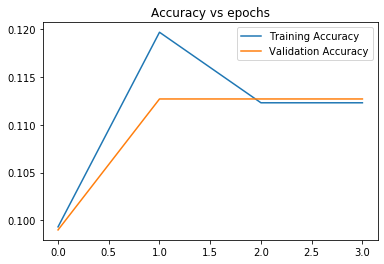

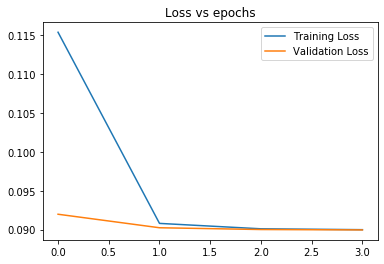

In [0]:
## visuzalimos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss'])

In [0]:
# Model Sofy 2

model2_inputs = Input(shape=(784,))
model2_layer1 = Dense(2000, activation="sigmoid")(model2_inputs)
model2_layer2 = Dense(1500, activation="sigmoid")(model2_layer1)
model2_layer3 = Dense(1200, activation="sigmoid")(model2_layer2)
model2_layer4 = Dense(1000, activation="sigmoid")(model2_layer3)
model2_layer5 = Dense(200, activation="sigmoid")(model2_layer4)
model2_predictions = Dense(10, activation="sigmoid")(model2_layer5)

In [0]:
### A completar: definir entrada y salida del modelo

model_sofy_2 = Model(inputs=model2_inputs, outputs=model2_predictions)

In [0]:
model_sofy_2.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2000)              1570000   
_________________________________________________________________
dense_2 (Dense)              (None, 1500)              3001500   
_________________________________________________________________
dense_3 (Dense)              (None, 1200)              1801200   
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              1201000   
_________________________________________________________________
dense_5 (Dense)              (None, 200)               200200    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2010

In [0]:
### A completar: definir optimizador y funcion de costo
from keras.optimizers import Adam

adam = Adam()

model_sofy_2.compile(
    optimizer=adam, 
    loss=mean_squared_error, 
    metrics=['accuracy']
)

In [0]:
## para guardar el modelo
filepath = "model_sofy_2.h5"
model_checkpoint = ModelCheckpoint(
    filepath, 
    monitor='loss', 
    verbose=1, 
    save_best_only=True
)

In [0]:
%%time
history = model_sofy_2.fit(
    x_train, 
    y_train,
    batch_size=32,  # para pasar pocas imagenes.
    epochs=2, 
    validation_data=(x_valid, y_valid), 
    callbacks=[model_checkpoint]
)




Train on 50000 samples, validate on 10000 samples
Epoch 1/2





50000/50000 [==============================] - 210s 4ms/step - loss: 0.0904 - acc: 0.1044 - val_loss: 0.0901 - val_acc: 0.1032

Epoch 00001: loss improved from inf to 0.09041, saving model to model_sofy_2.h5
Epoch 2/2
50000/50000 [==============================] - 208s 4ms/step - loss: 0.0902 - acc: 0.1027 - val_loss: 0.0902 - val_acc: 0.1001

Epoch 00002: loss improved from 0.09041 to 0.09018, saving model to model_sofy_2.h5
CPU times: user 12min 43s, sys: 26.4 s, total: 13min 10s
Wall time: 6min 59s


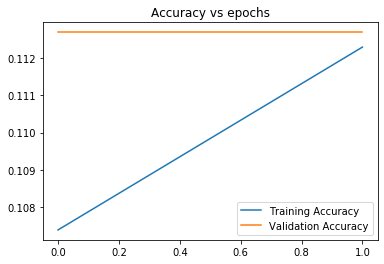

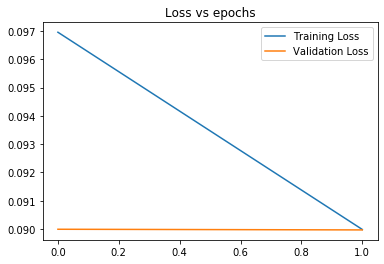

In [0]:
## visuzalimos curvas de entrenamiento

plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['acc'] )
plt.plot( history.history['val_acc'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss'])

### Conclusión
Ambos modelos son prácticamente iguales. No funcionan bien.
La accuracy es muy poco mejor a random.


In [0]:
model_sofy_1.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 85us/step


[0.08995645070075989, 0.1135]

# Comparación

In [0]:
model_1_loss, model_1_acc = model_sofy_1.evaluate(x=x_test, y=y_test, verbose=0)
print(f'Loss: {model_1_loss}')
print(f'Accuracy: {model_1_acc}')

Loss: 0.08998739762306214
Accuracy: 0.1135


In [0]:
x_test_example = x_test[0:1]
y_test_example = y_test[0:1]

In [0]:
x_test_example.shape

(1, 784)

In [0]:
y_test_example

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [0]:
probabilities = model_sofy_1.predict(x_test_example)

In [0]:
y_pred = probabilities.argmax(axis=-1)

In [0]:
probabilities

array([[0.09806514, 0.11097583, 0.09899595, 0.10199162, 0.0952602 ,
        0.09176391, 0.09680557, 0.10681483, 0.09801731, 0.09995282]],
      dtype=float32)

In [0]:
y_pred

array([1])

In [0]:
###

In [0]:
y_prob = model_sofy_1.predict(x_test)
y_pred = y_prob.argmax(axis=-1)
y_test_class = y_test.argmax(axis=-1)

In [0]:
y_prob.shape

(10000, 10)

In [0]:
y_pred.shape

(10000,)

In [0]:
y_test_class.shape

(10000,)

In [0]:
bad_classified_indexes = []

In [0]:
for i in range(len(y_prob)):
  if y_pred[i] != y_test_class[i]:
    bad_classified_indexes.append(i)

  if len(bad_classified_indexes) == 9:
    break

In [0]:
bad_classified_indexes

[0, 1, 3, 4, 6, 7, 8, 9, 10]

In [0]:
bad_classified_images = x_test[bad_classified_indexes]
bad_classified_labels = y_test[bad_classified_indexes].argmax(axis=-1)
bad_classified_preds = y_pred[bad_classified_indexes]

In [0]:
bad_classified_images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
bad_classified_images.shape

(9, 784)

In [0]:
bad_classified_labels.shape

(9,)

In [0]:
bad_classified_preds.shape

(9,)

In [0]:
bad_classified_image_1 = bad_classified_images[0]
bad_classified_label_1 = bad_classified_labels[0]
bad_classified_pred_1 = bad_classified_preds[0]

In [0]:
bad_classified_image_1.shape

(784,)

In [0]:
bad_classified_label_1.shape

()

In [0]:
bad_classified_pred_1

1

In [0]:
bad_classified_label_1

7

In [0]:
bad_classified_image_1 = bad_classified_image_1.reshape(28, 28)

In [0]:
bad_classified_image_1.shape

(28, 28)

Label: 7
Prediction: 1


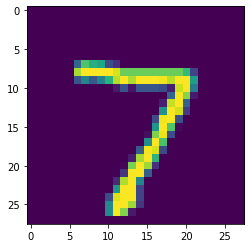

In [0]:
plt.imshow(bad_classified_image_1)
print(f'Label: {bad_classified_label_1}')
print(f'Prediction: {bad_classified_pred_1}')

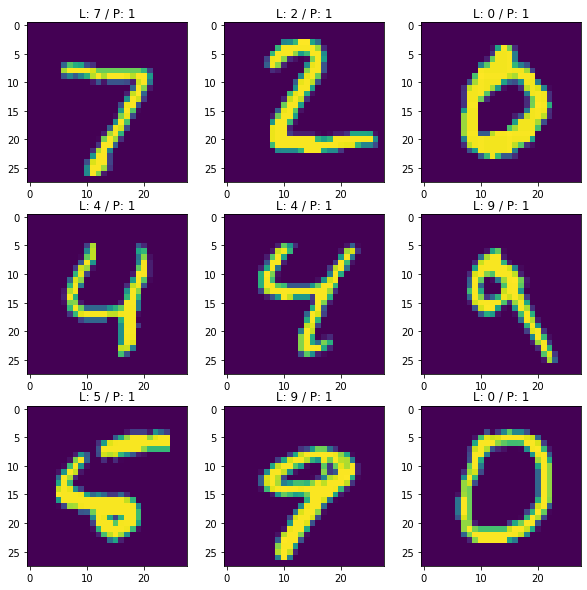

In [0]:
fig=plt.figure(figsize=(10, 10))

columns = 3
rows = 3

for i in range(1, columns*rows + 1):
    ax = fig.add_subplot(rows, columns, i)
    ax.set_title(f'L: {bad_classified_labels[i-1]} / P: {bad_classified_preds[i-1]}')
    img = bad_classified_images[i-1].reshape(28,28)
    plt.imshow(img)
  
plt.show()

---
# CNN

In [0]:
from keras.layers import Conv2D, Dense, Input, MaxPool2D, Flatten
from keras.models import Sequential

In [0]:
model_sofy_3 = Sequential()
model_sofy_3.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model_sofy_3.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_sofy_3.add(MaxPool2D(pool_size=(2,2)))
model_sofy_3.add(Flatten())
model_sofy_3.add(Dense(512, activation='relu'))
model_sofy_3.add(Dense(10, activation='sigmoid'))

In [0]:
model_sofy_3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               2769408   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 2,784,106
Trainable params: 2,784,106
Non-trainable params: 0
____________________________________________

In [0]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
x_train.shape

(50000, 28, 28)

In [0]:
y_train.shape

(50000,)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
y_test.shape

(10000,)

In [0]:
x_valid = x_train[-10000:]

In [0]:
x_valid.shape

(10000, 28, 28)

In [0]:
y_valid = y_train[-10000:]

In [0]:
y_valid.shape

(10000,)

In [0]:
x_train = x_train[:-10000]
y_train = y_train[:-10000]

In [0]:
from keras.utils import to_categorical

In [0]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
y_valid = to_categorical(y_valid, num_classes=10)

In [0]:
y_train.shape

(40000, 10)

In [0]:
y_test.shape

(10000, 10)

In [0]:
y_valid.shape

(10000, 10)

In [0]:
### A completar: definir optimizador y funcion de costo
from keras.optimizers import SGD

sgd = SGD()

model_sofy_3.compile(
    optimizer=sgd, 
    loss=mean_squared_error, 
    metrics=['accuracy']
)

In [0]:
## para guardar el modelo
filepath = "model_sofy_3.h5"
model_checkpoint = ModelCheckpoint(
    filepath, 
    monitor='loss', 
    verbose=1, 
    save_best_only=True
)

In [0]:
%%time
history = model_sofy_3.fit(
    x_train.reshape(x_train.shape[0], 28, 28, 1), 
    y_train,
    batch_size=32,  # para pasar pocas imagenes.
    epochs=2, 
    validation_data=(x_valid.reshape(x_valid.shape[0], 28, 28, 1), y_valid), 
    callbacks=[model_checkpoint]
)




Train on 40000 samples, validate on 10000 samples
Epoch 1/2





40000/40000 [==============================] - 128s 3ms/step - loss: 0.1457 - acc: 0.2072 - val_loss: 0.1370 - val_acc: 0.2573

Epoch 00001: loss improved from inf to 0.14568, saving model to model_sofy_3.h5
Epoch 2/2
40000/40000 [==============================] - 125s 3ms/step - loss: 0.0969 - acc: 0.3587 - val_loss: 0.0556 - val_acc: 0.4867

Epoch 00002: loss improved from 0.14568 to 0.09693, saving model to model_sofy_3.h5
CPU times: user 7min 32s, sys: 10.7 s, total: 7min 43s
Wall time: 4min 13s


# Data Augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(
    rotation_range=5,
    width_shift_range=0.1,
    height_shift_range=0.1,
    rescale=1./255,
    zoom_range=0.1,
    fill_mode='nearest'
)

In [0]:
train_datagen.fit(x_train)

In [0]:
# Model 4
model_sofy_4 = Sequential()
model_sofy_4.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model_sofy_4.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_sofy_4.add(MaxPool2D(pool_size=(2,2)))
model_sofy_4.add(Flatten())
model_sofy_4.add(Dense(512, activation='relu'))
model_sofy_4.add(Dense(10, activation='sigmoid'))

### A completar: definir optimizador y funcion de costo
from keras.optimizers import SGD

sgd = SGD()

model_sofy_4.compile(
    optimizer=sgd, 
    loss=mean_squared_error, 
    metrics=['accuracy']
)

## para guardar el modelo
filepath = "model_sofy_4.h5"
model_checkpoint = ModelCheckpoint(
    filepath, 
    monitor='loss', 
    verbose=1, 
    save_best_only=True
)

In [0]:
%%time
model_sofy_4.fit_generator(
    train_datagen.flow(
        x_train, 
        y_train,
        batch_size=64
    ),
    epochs=8,
    validation_data=(x_valid.reshape(x_valid.shape[0], 28, 28, 1), y_valid),
    callbacks=[model_checkpoint]
)

Epoch 1/8
625/625 [==============================] - 115s 184ms/step - loss: 0.0781 - acc: 0.4273 - val_loss: 0.0691 - val_acc: 0.3809

Epoch 00001: loss improved from 0.08452 to 0.07812, saving model to model_sofy_4.h5
Epoch 2/8
625/625 [==============================] - 114s 183ms/step - loss: 0.0721 - acc: 0.4850 - val_loss: 0.0608 - val_acc: 0.5232

Epoch 00002: loss improved from 0.07812 to 0.07207, saving model to model_sofy_4.h5
Epoch 3/8
625/625 [==============================] - 113s 181ms/step - loss: 0.0660 - acc: 0.5489 - val_loss: 0.0580 - val_acc: 0.6364

Epoch 00003: loss improved from 0.07207 to 0.06597, saving model to model_sofy_4.h5
Epoch 4/8
625/625 [==============================] - 114s 183ms/step - loss: 0.0614 - acc: 0.5909 - val_loss: 0.0623 - val_acc: 0.6889

Epoch 00004: loss improved from 0.06597 to 0.06139, saving model to model_sofy_4.h5
Epoch 5/8
625/625 [==============================] - 113s 180ms/step - loss: 0.0574 - acc: 0.6213 - val_loss: 0.0709 - v

In [0]:
# Model 5
model_sofy_5 = Sequential()
model_sofy_5.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model_sofy_5.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
model_sofy_5.add(MaxPool2D(pool_size=(2,2)))
model_sofy_5.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model_sofy_5.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model_sofy_5.add(MaxPool2D(pool_size=(2,2)))
model_sofy_5.add(Conv2D(filters=128, kernel_size=(3,3), input_shape=(28,28,1), padding='same', activation='relu'))
model_sofy_5.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model_sofy_5.add(MaxPool2D(pool_size=(2,2)))
model_sofy_5.add(Flatten())
model_sofy_5.add(Dense(512, activation='relu'))
model_sofy_5.add(Dense(10, activation='sigmoid'))

### A completar: definir optimizador y funcion de costo
from keras.optimizers import SGD

sgd = SGD()

model_sofy_5.compile(
    optimizer=sgd, 
    loss=mean_squared_error, 
    metrics=['accuracy']
)

## para guardar el modelo
filepath = "model_sofy_5.h5"
model_checkpoint = ModelCheckpoint(
    filepath, 
    monitor='loss', 
    verbose=1, 
    save_best_only=True
)

In [0]:
%%time
model_sofy_5.fit_generator(
    train_datagen.flow(
        x_train, 
        y_train,
        batch_size=64
    ),
    epochs=8,
    validation_data=(x_valid.reshape(x_valid.shape[0], 28, 28, 1), y_valid),
    callbacks=[model_checkpoint]
)

Epoch 1/8
625/625 [==============================] - 174s 279ms/step - loss: 0.2176 - acc: 0.0977 - val_loss: 0.1000 - val_acc: 0.1008

Epoch 00001: loss improved from inf to 0.21759, saving model to model_sofy_5.h5
Epoch 2/8
625/625 [==============================] - 175s 280ms/step - loss: 0.0945 - acc: 0.1157 - val_loss: 0.1000 - val_acc: 0.1008

Epoch 00002: loss improved from 0.21759 to 0.09446, saving model to model_sofy_5.h5
Epoch 3/8
625/625 [==============================] - 173s 277ms/step - loss: 0.0903 - acc: 0.1169 - val_loss: 0.1000 - val_acc: 0.1008

Epoch 00003: loss improved from 0.09446 to 0.09031, saving model to model_sofy_5.h5
Epoch 4/8
587/625 [===========================>..] - ETA: 9s - loss: 0.0902 - acc: 0.1152 

KeyboardInterrupt: ignored

**Este tipo de herramientas pueden ser utilizadas en el campo de la ingeniería biomédica para procesar imágenes médicas con el fin de aproximar alguna patología que se pueda apreciar a partir de la observación morfológica de la misma, por ejemplo tumores, pólipos, órganos atrofiados o lesionados, etc. Por otro lado se pueden usar para el análisis de lunares a partir del estudio de la forma, tratando de clasificarlos como malignos o sin peligro. **
